## Support Vector Machine


### 1) Get the dataset

In [2]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import numpy as np
import pandas as pd

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) #Otherwise prints in scientific format

%matplotlib inline 
#Needed to inline graphs
import matplotlib.pyplot as plt


# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
print("No. of datapoints : ", len(dataset))
dataset[:10]

No. of datapoints :  400


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### 2) Separate the dep and indep variables into a numpy array

We are only going to consider **age** and **salary** as independent variables to predict purchases.

In [3]:
X = dataset.iloc[:,[2,3]].values 
y = dataset.iloc[:, 4].values

### 3) Splitting into training and test set

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 4) Feature scaling

Is feature scaling needed for this algorithm? 

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainS = sc.fit_transform(X_train)
X_testS = sc.transform(X_test)

### 5) Predict using SVM

In [7]:
from sklearn.svm import SVC

In [8]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

In [10]:
classifier = SVC(kernel='linear',random_state=0)
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
classifier.fit(X_trainS,y_train)
y_pred = classifier.predict(X_testS)
pd.DataFrame(np.hstack((X_test, y_pred.reshape(-1,1),y_test.reshape(-1,1))),columns=["Age","Salary","Purch_predict","Purch_actual"])[:10] #hstack takes 2D arrays

,Age,Salary,Purch_predict,Purch_actual
0,30,87000,0,0
1,38,50000,0,0
2,35,75000,0,0
3,30,79000,0,0
4,35,50000,0,0
5,27,20000,0,0
6,31,15000,0,0
7,36,144000,1,1
8,18,68000,0,0
9,47,43000,0,0


### 6) Printing Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[66  2]
 [ 8 24]]


### 7) Without Feature scaling

The classifier hangs

In [13]:
# classifier.fit(X_train,y_train)
# y_pred = classifier.predict(X_test)
# cm = confusion_matrix(y_test,y_pred)
# print(cm)

### 7) Visualizing the class boundry

(With features scaled)

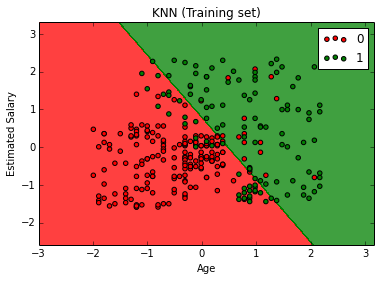

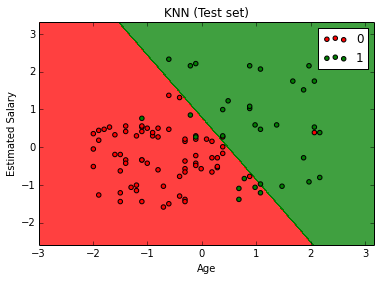

In [14]:
import plot_binary as pb

classifier.fit(X_trainS,y_train)
plt = pb.plot_binary(X_trainS,y_train,classifier)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

plt = pb.plot_binary(X_testS,y_test,classifier)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()